In [21]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import pandas as pd  
import matplotlib.pyplot  as plt 


In [2]:
class Model(nn.Module) :
    def __init__( self , input_features=4 , h1= 8 , h2= 9 , out_features = 3 ) : 
      super().__init__() 
      self.fc1 = nn.Linear( input_features , h1 ) 
      self.fc2 = nn.Linear( h1 , h2) 
      self.out = nn.Linear( h2 , out_features ) 
        
    def forward(self , x ): 
      x = F.relu(self.fc1(x) ) 
      x = F.relu(self.fc2(x)) 
      x= self.out(x) 
        
      return x 

In [3]:
#pick a manual seed for  randomazation ( wheight and bias ) 
torch.manual_seed(41) #pick a manual seed for  randomazation ( wheight and bias ) 
model = Model() 

In [4]:
my_df = pd.read_csv("./8836201/iris.csv") 

In [5]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [18]:
#change last row 
my_df['variety'] = my_df['variety'].replace('Setosa' , 0.0) 
my_df['variety'] = my_df['variety'].replace('Versicolor' , 1.0) 
my_df['variety'] = my_df['variety'].replace('Virginica' , 2.0) 

In [7]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#Train test  split set X , y 
x = my_df.drop("variety" , axis=1) 
y = my_df['variety'] 

In [9]:
#conveert it to numpyt arrys 
x= x.values
y= y.values



In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
#train test split 
X_train , X_test , Y_train , Y_test = train_test_split(x ,y , test_size=0.2 , random_state=41 ) 

In [12]:
#converting x features  to float tensors 
x_train = torch.FloatTensor(X_train) 
x_test = torch.FloatTensor(X_test) 

In [13]:
#convrting y fetures to float tensors 
y_train = torch.LongTensor(Y_train) 
y_test = torch.LongTensor(Y_test)

In [14]:
#CorssEntropyLoss  is a  type of cost functiion that measuers the cost/error deiffrence between actual data and 
#actual data  How far pridiction is from  actual data 
criterion = nn.CrossEntropyLoss()
#choose adam optimizer , lr = learning rate ( if error dosen't go down after bunch of itration , decreas the learing rat rate 
optimizer = torch.optim.Adam(model.parameters() , lr=0.01) 

In [15]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [17]:
#modle traing 
epochs = 100  
losses = [] 
for i  in range(epochs) : 
    #forward propogation  and get a preidiction 
    y_pridict = model.forward(x_train )  # get  pridicted results 

    # measure the loss / error ( cost function ) 
    loss = criterion( y_pridict , y_train) 
    # to keep track our loss  
    # and converting pytorch tensor to numpy array 
    losses.append(loss.detach().numpy() ) 

    if i %10 ==0 : 
        print(f'Epoch:{i} and loss :{loss} ' )

    #back propogation 
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step() 
    

Epoch:0 and loss :1.125203251838684 
Epoch:10 and loss :1.0097211599349976 
Epoch:20 and loss :0.8162347078323364 
Epoch:30 and loss :0.585993230342865 
Epoch:40 and loss :0.4003389775753021 
Epoch:50 and loss :0.26794716715812683 
Epoch:60 and loss :0.1796349734067917 
Epoch:70 and loss :0.12165624648332596 
Epoch:80 and loss :0.0860651433467865 
Epoch:90 and loss :0.06522615253925323 


Text(0.5, 0, 'Epcho')

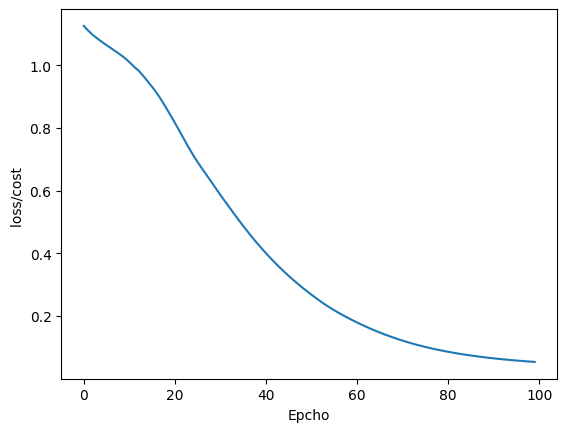

In [24]:
#grpah of cost / loss 
plt.plot(range(epochs) , losses ) 
plt.ylabel("loss/cost " ) 
plt.xlabel("Epcho" ) 

In [25]:
#evaluate Modle on test data set ( validate  modle on test set ) 
with torch .no_grad() : #basically trun off back propgation 
    y_eval = model.forward(x_test) 
    loss = criterion(y_eval , y_test)  # find loss on error data 

In [26]:
loss

tensor(0.1315)

In [31]:
correct = 0 
with torch.no_grad(): 
    for i , data in enumerate(x_test) : 
        y_val = model.forward(data) 
    #print what type of flower netwerk it is 
        print(f'{i+1} ) {str(y_val)} \t {y_val.argmax().item()}') 

    #print how many are correct 
        if y_val.argmax().item() ==y_test[i] : 
            correct +=1 
print(f'we got {correct} correct' ) 

1 ) tensor([-5.8771,  4.4629,  6.5155]) 	 2
2 ) tensor([-7.5451,  4.1668,  9.7293]) 	 2
3 ) tensor([-8.4517,  5.1275, 10.2015]) 	 2
4 ) tensor([-4.3411,  5.6280,  2.5636]) 	 1
5 ) tensor([-7.1838,  4.8757,  8.3023]) 	 2
6 ) tensor([-3.3940,  5.3421,  1.2802]) 	 1
7 ) tensor([-5.9240,  4.9826,  6.0025]) 	 2
8 ) tensor([-4.2895,  5.7016,  2.3920]) 	 1
9 ) tensor([-6.5369,  4.9261,  7.1291]) 	 2
10 ) tensor([-8.0526,  4.4129, 10.3325]) 	 2
11 ) tensor([-5.6774,  4.9505,  5.6248]) 	 2
12 ) tensor([ 4.5748, -2.2579, -2.8925]) 	 0
13 ) tensor([ 4.2646, -2.0055, -2.7342]) 	 0
14 ) tensor([-2.1081,  4.0482,  0.5803]) 	 1
15 ) tensor([ 3.4608, -1.2147, -2.3488]) 	 0
16 ) tensor([-5.4739,  5.1174,  5.0966]) 	 1
17 ) tensor([ 4.0637, -1.8045, -2.6504]) 	 0
18 ) tensor([-5.8090,  4.6057,  6.2494]) 	 2
19 ) tensor([ 4.9250, -2.5763, -3.0545]) 	 0
20 ) tensor([ 3.4559, -1.2559, -2.3637]) 	 0
21 ) tensor([-2.6161,  4.5584,  0.8575]) 	 1
22 ) tensor([-7.7427,  4.7379,  9.4233]) 	 2
23 ) tensor([ 3.577

In [32]:
new_iris = torch.tensor([4.7, 3.2,1.3,0.20]) 

with torch.no_grad() : 
    print(model(new_iris) ) 

tensor([ 4.5445, -2.2478, -2.8698])


In [35]:
## save our modle 
torch.save(model.state_dict() , "my_iris_pridiction_Model.pt" ) 

In [37]:
## load saved modle 
new_model = Model() 
new_model.load_state_dict(torch.load( 'my_iris_pridiction_Model.pt')) 

<All keys matched successfully>

In [38]:
## make sure it loaded corrctly 
new_model.eval() 

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)